# WFE and PSF Metrics for VisMCAO
5000 actuators, 6 LGS (7mag), 1 TT (8mag)

In [8]:
from paarti.utils import maos_utils
import matplotlib.pyplot as plt
from bpeck.mcao import act_study

In [2]:
maos_utils.print_psf_metrics_x0y0(seed=1)

Looking in ./ for simulation results...
Wavelength Strehl  FWHM_gaus   FWHM_emp r_EE80
(microns)              (mas)      (mas)  (mas)
     0.432   0.04       12.4       13.4   70.0
     0.544   0.11       14.3       14.8   78.1
     0.652   0.21       15.4       16.7   83.7
     0.810   0.36       18.1       19.7   86.6
     0.877   0.42       19.1       20.7   83.1
     1.020   0.52       22.0       23.2   81.0
     1.248   0.65       25.1       27.7   64.8
     1.673   0.78       33.1       36.4   66.5
     2.200   0.87       42.2       47.3   80.7


(array([0.432, 0.544, 0.652, 0.81 , 0.877, 1.02 , 1.248, 1.673, 2.2  ]),
 array([0.04052842, 0.11377435, 0.21282833, 0.3603869 , 0.41694949,
        0.52131113, 0.64525679, 0.78249247, 0.86736811]),
 array([12.37326295, 14.28528507, 15.41250589, 18.10030557, 19.12519203,
        21.96386868, 25.09167518, 33.1381577 , 42.23569428]),
 array([13.37101871, 14.8074634 , 16.7464569 , 19.72049985, 20.65141317,
        23.19824684, 27.71398594, 36.35529953, 47.25615832]),
 array([69.96494667, 78.12998   , 83.6794    , 86.63118333, 83.07731333,
        81.03914   , 64.8312    , 66.4599    , 80.6724    ]))

In [3]:
total = maos_utils.print_wfe_metrics(seed=1)

---------------------
WaveFront Error (nm): [note, piston removed from all]
---------------------
Field Avg        Total   High_Order           TT
---------  -----------   ----------   ----------
Open             883.8        836.4        285.7
Closed           350.0        336.4         96.8

Pos  0 
-------  
Open             945.3        859.0        394.5
Closed           140.1        124.3         64.6

Pos  1 
-------  
Open             931.4        855.5        368.2
Closed           152.6        137.3         66.6

Pos  2 
-------  
Open             913.2        847.3        340.5
Closed           159.6        145.4         65.9

Pos  3 
-------  
Open             895.1        839.1        311.6
Closed           155.1        141.6         63.3

Pos  4 
-------  
Open             878.7        832.3        281.8
Closed           172.1        161.0         60.7

Pos  5 
-------  
Open             865.0        827.5        252.1
Closed           212.9        204.1         60.6

Pos

/u/bpeck/code/paarti/paarti/utils/maos_utils.py:553: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if results_xx != None:


In [4]:
import importlib
from paarti.utils import maos_utils
import readbin
import numpy as np
import matplotlib.pyplot as plt

#wfs.thetax = [30.0, -15.0, -15.0]
#wfs.thetay = [0.0, 25.98, -25.98]


([30.0, -15.0, -15.0], [0.0, 25.98, -25.98])

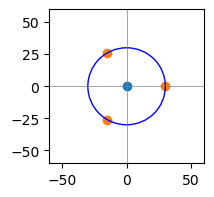

In [5]:
n_lgs = 3
radius = 30

def calculate_radius(n_lgs, radius):
    x = []
    y = []
    
    angles = np.linspace(0, 2*np.pi, n_lgs, endpoint=False)
    
    for angle in angles:
        x_calc = np.round(radius * np.cos(angle), 2)
        x.append(x_calc)

        y_calc = np.round(radius * np.sin(angle), 2)
        y.append(y_calc)

    plt.figure(figsize=(2,2))
    plt.scatter(0,0)
    plt.plot([-60,60], [0,0], color = 'grey', linewidth=0.5)
    plt.plot([0,0], [-60,60], color = 'grey', linewidth=0.5)
    plt.scatter(x, y)  
    plt.xlim(-60,60)
    plt.ylim(-60,60)

    circle = plt.Circle((0, 0), radius, color='b', fill=False)
    plt.gca().add_patch(circle)

    print(f"#wfs.thetax = {x}")
    print(f"#wfs.thetay = {y}")
    
    return x, y

calculate_radius(n_lgs, radius)

In [6]:
#Define data and parameters 
directory = './'
seed = 1

psf_x = [0, 5, 10, 15, 20, 25, 30, 35, 45, 60]
psf_y = [0, 0,  0,  0,  0,  0,  0,  0,  0,  0]
wfe = ["Total WFE", "Tip-Tilt", "High-Order"]

colors = ["r", "g", "b"]

%matplotlib inline

In [11]:
#Load results
results_xx_file = f'{directory}/extra/Resp_{seed}.bin'
results_xx = readbin.readbin(results_xx_file)

open_mean_nm, clos_mean_nm, open_xx_mean_nm, clos_xx_mean_nm= act_study.get_wfe_metrics(seed=1)

n_psf = clos_xx_mean_nm.shape[0]

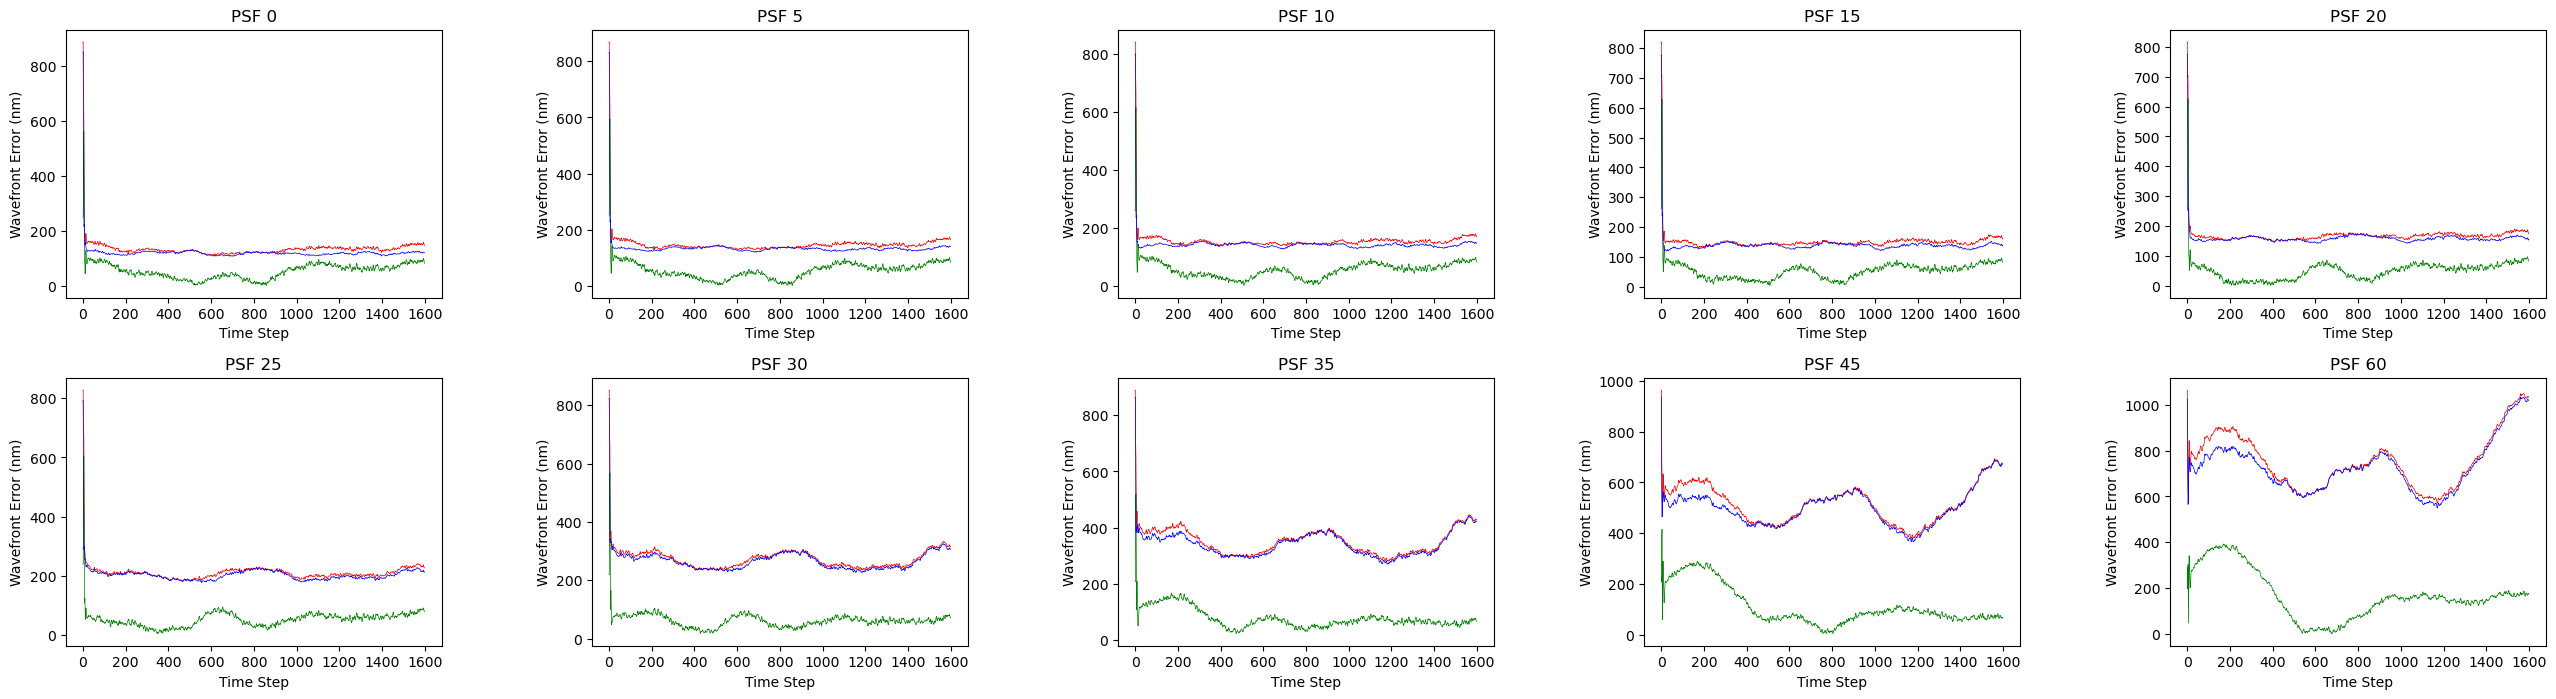

In [12]:
#Plotting
fig, ax = plt.subplots(2, n_psf // 2, figsize= (32,8), gridspec_kw={'hspace': 0.3, 'wspace': 0.4})

for i in range(n_psf):
    row_index = i // (n_psf // 2)
    col_index = (i % (n_psf // 2))
    clos_psf_results = results_xx[3][i]
    for j in range(clos_psf_results.shape[1]):
        ax[row_index,col_index].plot(np.sqrt(clos_psf_results[:,j])*1.0e9, color=colors[j], label=wfe[j], linewidth=0.5)
        ax[row_index,col_index].set_xlabel('Time Step')
        ax[row_index,col_index].set_ylabel('Wavefront Error (nm)')
        ax[row_index,col_index].set_title(f'PSF {psf_x[i]}')

## Setup

In [4]:
import pylab as plt
import numpy as np
from paarti.utils import maos_utils
from paarti import psfs, psf_plots

psf_x = [0, 5, 10, 15, 20, 25, 30, 35, 45, 60]  # arcsec
psf_y = [0, 0,  0,  0,  0,  0,  0,  0,  0,  0]  # arcsec
psf_wvl = [432, 544, 652, 810, 877, 1020, 1248, 1673, 2200]

seed = 1

%matplotlib inline

In [59]:
#mets = maos_utils.get_psf_metrics_over_field(seed=seed)
#x, y, w, strehl, fwhm_g, fwhm_e, r_ee50, r_ee80 = mets

In [60]:
#x.shape

## Strehl

In [63]:
#n_wvl = x.shape[1]
#colors = plt.cm.jet(np.linspace(0,1,n_wvl))

#plt.figure(1)

#for ww in range(n_wvl):
   # label = f'{w[0, ww]*1e3:3.0f} nm'
   # plt.plot(x[:, ww], strehl[:, ww], color=colors[ww], label=label)    

#plt.legend(fontsize=12)
#plt.xlabel('Science Target Radius (")')
#plt.ylabel('Strehl')
#plt.axvline(30, linestyle='--', color='grey')
#plt.text(31, 0.2, 'LGS radius', color='grey')
#plt.title('Science Target Radius (") vs. Strehl')

## Empirical FWHM

In [64]:
#n_wvl = x.shape[1]
#colors = plt.cm.jet(np.linspace(0,1,n_wvl))

#plt.figure(1)

#for ww in range(n_wvl):
  #  label = f'{w[0, ww]*1e3:3.0f} nm'
  #  plt.plot(x[:, ww], fwhm_e[:, ww], color=colors[ww], label=label)    

#plt.legend(fontsize=12)
#plt.xlabel('Science Target Radius (")')
#plt.ylabel('Emp. FWHM (mas)')
#plt.axvline(30, linestyle='--', color='grey')
#plt.xlim(0, 40)
#plt.ylim(0, 200)
#plt.text(31, 0.2, 'LGS radius', color='grey')
#plt.title('Science Target Radius (") vs. Emp. FWHM (mas)')

## Encircled Energy (50 and 80)

In [65]:
#n_wvl = x.shape[1]
#colors = plt.cm.jet(np.linspace(0,1,n_wvl))

#fig, axs = plt.subplots(1, 2, figsize=(14, 6))
#fig.subplots_adjust(wspace=0.3)
    
#for ww in range(n_wvl):
  #  label = f'{w[0, ww]*1e3:3.0f} nm'
  #  axs[0].plot(x[:, ww], r_ee50[:, ww], color=colors[ww], label=label)    
  #  axs[1].plot(x[:, ww], r_ee80[:, ww], color=colors[ww])    

#axs[0].legend(fontsize=12)
#axs[0].set_xlabel('Science Target Radius (")')
#axs[1].set_xlabel('Science Target Radius (")')
#axs[0].set_ylabel('EE50 Radius (mas)')
#axs[1].set_ylabel('EE80 Radius (mas)')
#axs[0].axvline(30, linestyle='--', color='grey')
#axs[1].axvline(30, linestyle='--', color='grey')
#axs[0].set_xlim(0, 40)
#axs[0].set_ylim(0, 200)
#axs[1].set_xlim(0, 40)
#axs[1].set_ylim(0, 200)
#axs[1].text(29, 20, 'LGS radius', color='grey', ha='right')
#axs[0].set_title('Science Target Radius (") vs. EE50 Radius (mas)')
#axs[1].set_title('Science Target Radius (") vs. EE80 Radius (mas)')